Although Linear Regression is suited for estumating continuous values, it is not favourable to use linear regression for categorical variables and thus Logistic Regression comes into play.

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

In [4]:
df = pd.read_csv('ChurnData.csv')
df.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


##### Data Preprocessing

In [5]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
df['churn'] = df['churn'].astype('int')
df.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,0


In [6]:
x = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [7]:
y = np.asarray(df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [8]:
# Normalize the dataset
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

Train / Test split

In [10]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 4)
print('Train set : ', xTrain.shape, yTrain.shape)
print('Test set : ', xTest.shape, yTest.shape)

Train set :  (160, 7) (160,)
Test set :  (40, 7) (40,)


Logistic Regression in scikit-learn support regularization. Regularization is a technique used to solve overfitting problems. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logistic = LogisticRegression(C = 0.01, solver = 'liblinear').fit(xTrain, yTrain)
logistic

LogisticRegression(C=0.01, solver='liblinear')

In [12]:
yHat = logistic.predict(xTest)
yHat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [13]:
yHatProbability = logistic.predict_proba(xTest)
yHatProbability

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

#### Evaluation

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plotConfusionMatrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tickMarks = np.arange(len(classes))
    plt.xticks(tickMarks, classes, rotation = 45)
    plt.yticks(tickMarks, classes)
    
    fmt = '.2f' if normalize else 'd'
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = 'center', color = 'white' if cm[i, j] > threshold else 'black')
                 
    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

print(confusion_matrix(yTest, yHat, labels = [1, 0]))

[[ 6  9]
 [ 1 24]]


Confusion Matrix without normalization
[[ 6  9]
 [ 1 24]]


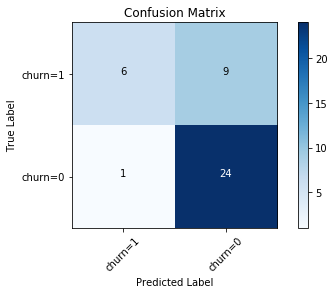

In [20]:
# Compute confusion matrix
cnfMatrix = confusion_matrix(yTest, yHat, labels = [1, 0])
np.set_printoptions(precision = 2)

# Plot normalized matrix
plt.figure()
plotConfusionMatrix(cnfMatrix, classes = ['churn=1', 'churn=0'], normalize = False, title = 'Confusion Matrix')

In [21]:
print(classification_report(yTest, yHat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [22]:
from sklearn.metrics import log_loss
log_loss(yTest, yHatProbability)

0.6017092478101186